### Import Dataset

Import both good and bad dataset seprately into 2 different DataFrame

In [1]:
import pandas as pd

g_df = pd.read_csv("../data/Good_Nozzle_set1.csv")
b_df = pd.read_csv("../data/Worst_Nozzle_set1.csv")
b_df.head()


,Date,Time,ms,Data_Type,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure
0,4/12/2024,5:55:37 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,5.004,1775,301.4,0,62.26,62.61,5.192,0.002
1,4/12/2024,5:55:38 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,5.007,1770,299.5,0,62.26,62.61,5.192,0.002
2,4/12/2024,5:55:39 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,5.007,1767,298.6,0,62.26,62.61,5.192,0.002
3,4/12/2024,5:55:40 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,5.007,1767,299.5,0,62.26,62.61,5.192,0.002
4,4/12/2024,5:55:41 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,5.007,1767,301.9,0,62.26,62.61,5.192,0.002


### Filter specific range of data

Monitor the Cold Spray Machine's parameter values after all the parameters have stabilized for at least 5 minutes.

In [2]:
from datetime import datetime, timedelta

# Define good nozzle time range
# g_start_time = "3:48:00 am"
# g_end_time = "3:50:59 am"

g_start_time = "4:47:00 pm"
g_end_time = "4:51:59 pm"

# Filter the DataFrame to create good nozzle DataFrame
g_nozzle_df = g_df[
    (g_df["Time"] >= g_start_time) &
    (g_df["Time"] <= g_end_time)
].reset_index(drop=True)

# Define bad nozzle time range
# b_start_time = "4:08:44 am"
# b_end_time = "4:11:43 am"

b_start_time = "6:10:00 pm"
b_end_time = "6:14:59 pm"

# Filter the DataFrame to create bad nozzle DataFrame
b_nozzle_df = b_df[
    (b_df["Time"] >= b_start_time) &
    (b_df["Time"] <= b_end_time)
].reset_index(drop=True)

# Output results
print(f"Number of data points for good nozzle: {len(g_nozzle_df)}")
print(f"Duration of recording of good nozzle(mins): {len(g_nozzle_df) / 60:.2f} mins")

print(f"Number of data points for bad nozzle: {len(b_nozzle_df)}")
print(f"Duration of recording of bad nozzle(mins): {len(b_nozzle_df) / 60:.2f} mins")

b_nozzle_df.head()

Number of data points for good nozzle: 300
Duration of recording of good nozzle(mins): 5.00 mins
Number of data points for bad nozzle: 300
Duration of recording of bad nozzle(mins): 5.00 mins


,Date,Time,ms,Data_Type,ABB_X,ABB_Y,ABB_Z,Chamber_Temp,Chamber_Pressure,Main_Gas_Flow,PF1_Gas_Flow,PF2_Gas_Flow,PF1_LibraWeight,PF2_LibraWeight,PF1_Pressure,PF2_Pressure
0,4/12/2024,6:10:00 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,4.998,1741,300.6,0,62.26,62.61,5.182,0.002
1,4/12/2024,6:10:01 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,4.998,1737,299.4,0,62.26,62.61,5.182,0.002
2,4/12/2024,6:10:02 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,4.998,1737,297.4,0,62.26,62.61,5.182,0.002
3,4/12/2024,6:10:03 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,4.995,1741,297.4,0,62.26,62.61,5.182,0.002
4,4/12/2024,6:10:04 pm,0,Double[12],-509.83,-2213.82,1278.23,1000,4.995,1736,298.7,0,62.26,62.60,5.182,0.002


### Exploratory Data Analysis (EDA)

In [3]:
import matplotlib.pyplot as plt

def plot_columns_in_grid_overlay(good_df, bad_df, y_columns, nrows=1, ncols=3, figsize=(15, 5)):
    """
    Plots multiple columns from two DataFrames ("good" and "bad") in a grid of subplots,
    overlaying the corresponding variables for comparison.

    Parameters:
        good_df (pd.DataFrame): The DataFrame containing the "good" data.
        bad_df (pd.DataFrame): The DataFrame containing the "bad" data.
        y_columns (list): List of column names to plot.
        nrows (int): Number of rows in the grid.
        ncols (int): Number of columns in the grid.
        figsize (tuple): Figure size.

    Returns:
        None
    """
    # Create a grid of subplots
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = axes.flatten()  # Flatten the 2D array of axes for easier iteration

    # Plot each column in the corresponding subplot
    for i, column in enumerate(y_columns):
        if i < len(axes):  # Avoid indexing errors
            ax = axes[i]

            # Plot data from the "good" DataFrame
            if column in good_df.columns:
                ax.plot(good_df[column], marker='.', label=f"Good - {column}", alpha=0.7, color='g')

            # Plot data from the "bad" DataFrame
            if column in bad_df.columns:
                ax.plot(bad_df[column], marker='.', label=f"Bad - {column}", alpha=0.7, color='r')

            # Set title and labels
            ax.set_title(column, fontsize=10)
            ax.legend(fontsize=8)
            ax.grid(True)
            ax.get_xaxis().set_visible(False)  # Hide x-axis
            ax.set_ylabel(column, fontsize=8)

    # Remove unused subplots
    for i in range(len(y_columns), len(axes)):
        fig.delaxes(axes[i])

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_columns_in_grid_overlay(good_df, bad_df, y_columns=["Column1", "Column2"], nrows=2, ncols=3)


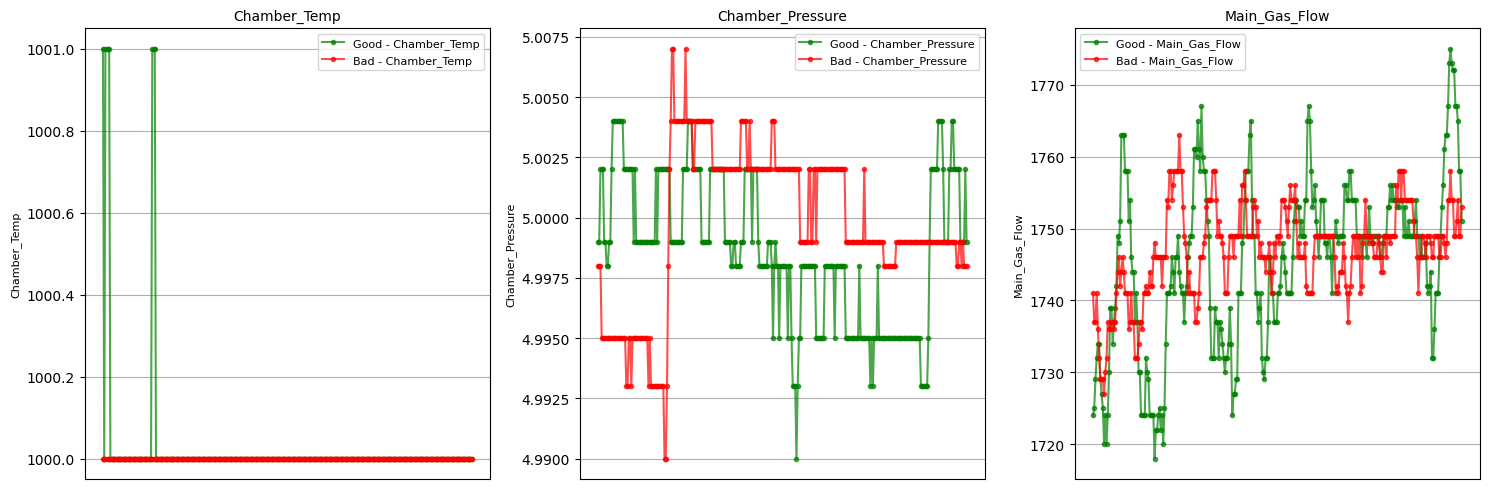

In [4]:
# List of columns for y-axis
y_columns = ["Chamber_Temp", "Chamber_Pressure", "Main_Gas_Flow"]
plot_columns_in_grid_overlay(g_nozzle_df, b_nozzle_df, y_columns, nrows=1, ncols=3, figsize=(15, 5))


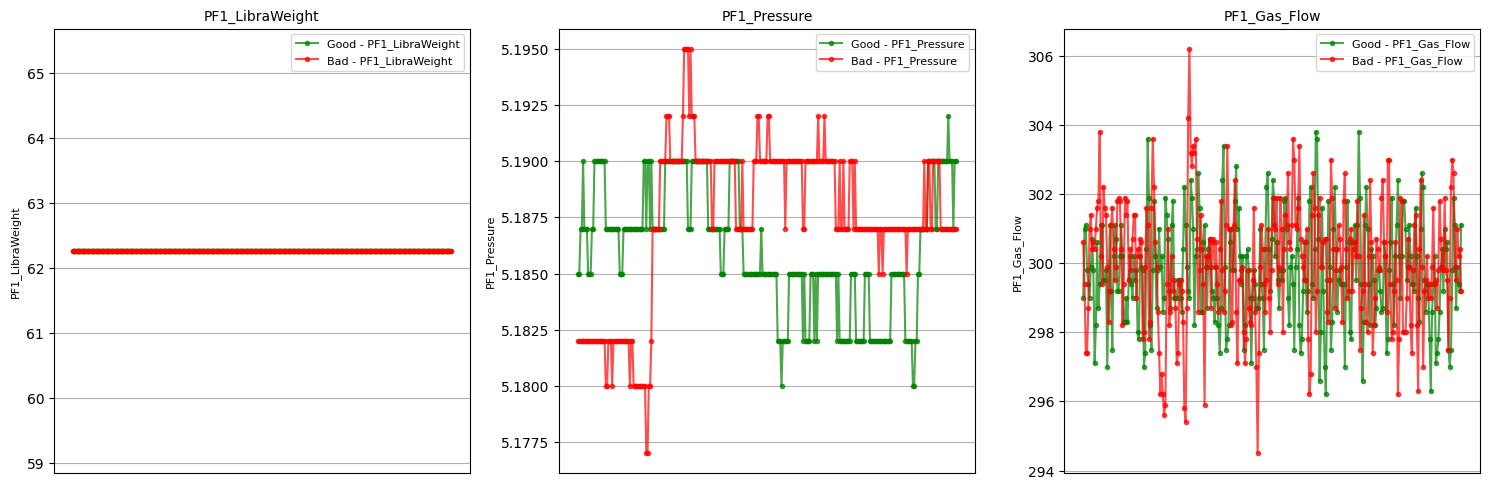

In [5]:
# List of columns for y-axis
y_columns = ["PF1_LibraWeight", "PF1_Pressure", "PF1_Gas_Flow"]
plot_columns_in_grid_overlay(g_nozzle_df, b_nozzle_df, y_columns, nrows=1, ncols=3, figsize=(15, 5))


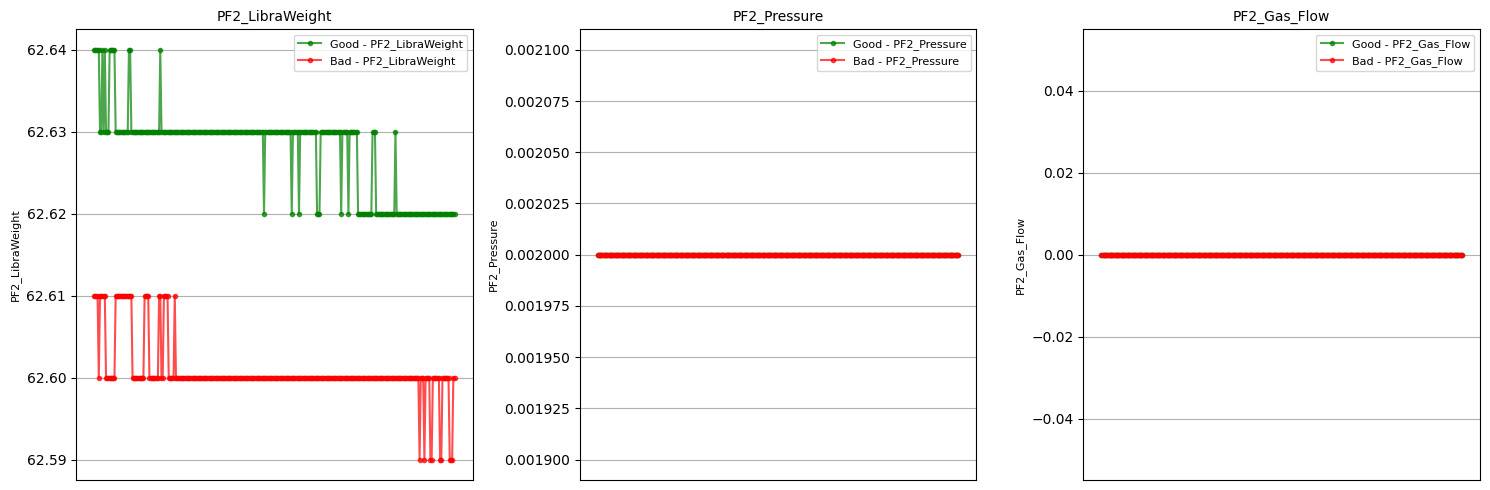

In [6]:
# List of columns for y-axis
y_columns = ["PF2_LibraWeight", "PF2_Pressure", "PF2_Gas_Flow"]
plot_columns_in_grid_overlay(g_nozzle_df, b_nozzle_df, y_columns, nrows=1, ncols=3, figsize=(15, 5))


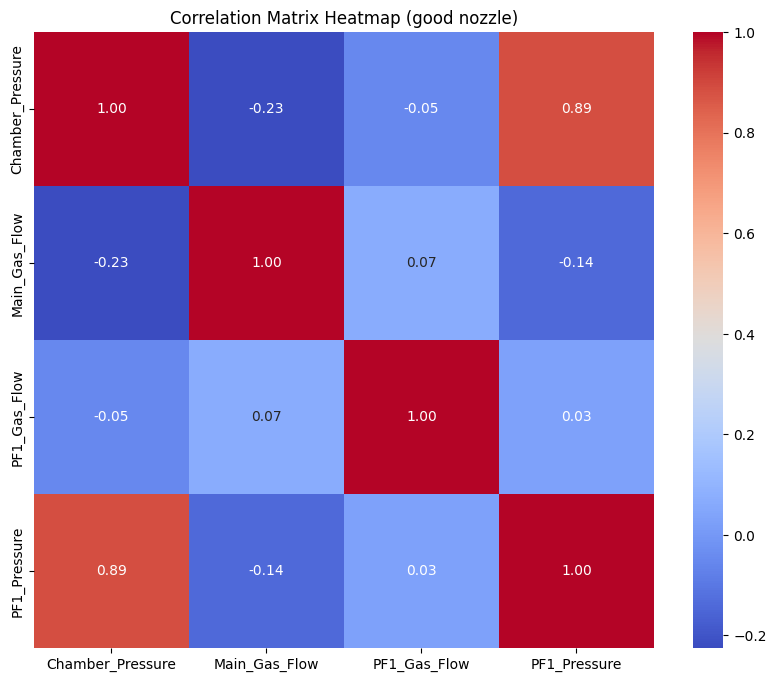

In [7]:
import seaborn as sns
import numpy as np

pros_param = ["Chamber_Pressure", "Main_Gas_Flow", "PF1_Gas_Flow", "PF1_Pressure"]

# Filter the DataFrame for good nozzle process parameters
g_pros_param_df = g_nozzle_df[pros_param]

# Compute the covariance matrix
g_corr_matrix = g_pros_param_df.corr(method='spearman')  # or 'kendall'

# Visualization (Optional)
plt.figure(figsize=(10, 8))
sns.heatmap(g_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap (good nozzle)")
plt.show()



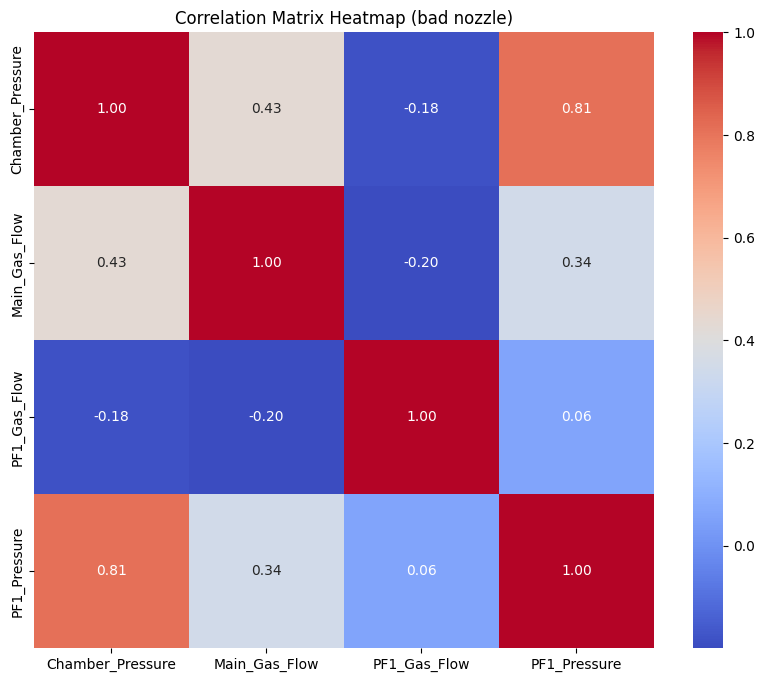

In [8]:
# Filter the DataFrame for process parameters
b_pros_param_df = b_nozzle_df[pros_param]

# Compute the covariance matrix
b_corr_matrix = b_pros_param_df.corr(method='spearman')  # or 'kendall'

# Visualization (Optional)
plt.figure(figsize=(10, 8))
sns.heatmap(b_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap (bad nozzle)")
plt.show()

Mean of Main Gas Flow (Good Nozzle)              : 1745.3266666666666
Standard Deviation of Main Gas Flow (Good Nozzle): 11.496374307677277
Mean of Main Gas Flow (Bad Nozzle)               : 1746.9666666666667
Standard Deviation of Main Gas Flow (Bad Nozzle) : 6.253443495831361


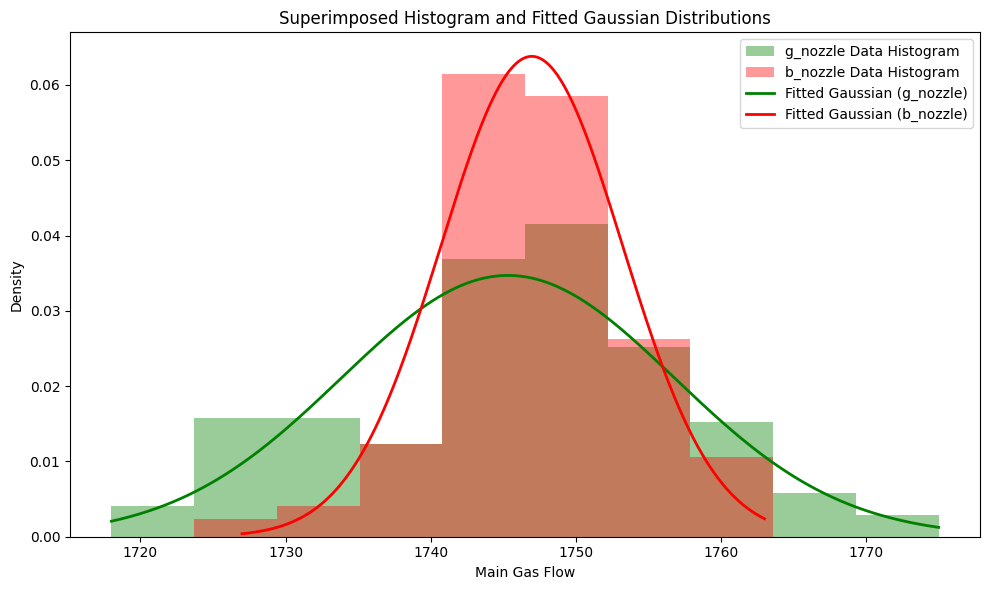

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming g_nozzle_df["Main_Gas_Flow"] and b_nozzle_df["Main_Gas_Flow"] are available
g_main_gas_flow = g_nozzle_df["Main_Gas_Flow"]
b_main_gas_flow = b_nozzle_df["Main_Gas_Flow"]

# Calculate mean and std for both datasets
mean_g = np.mean(g_main_gas_flow)
std_g = np.std(g_main_gas_flow)

mean_b = np.mean(b_main_gas_flow)
std_b = np.std(b_main_gas_flow)

# Fit Gaussian distributions
x_g = np.linspace(min(g_main_gas_flow), max(g_main_gas_flow), 1000)
pdf_fitted_g = norm.pdf(x_g, mean_g, std_g)

x_b = np.linspace(min(b_main_gas_flow), max(b_main_gas_flow), 1000)
pdf_fitted_b = norm.pdf(x_b, mean_b, std_b)

# Print mean and std for both
print(f"Mean of Main Gas Flow (Good Nozzle)              : {mean_g}")
print(f"Standard Deviation of Main Gas Flow (Good Nozzle): {std_g}")
print(f"Mean of Main Gas Flow (Bad Nozzle)               : {mean_b}")
print(f"Standard Deviation of Main Gas Flow (Bad Nozzle) : {std_b}")

bins = 10

# Find the global min and max to ensure both histograms have the same range
min_range = min(min(g_main_gas_flow), min(b_main_gas_flow))
max_range = max(max(g_main_gas_flow), max(b_main_gas_flow))

# Plotting histograms and Gaussian fits superimposed
plt.figure(figsize=(10, 6))

# Histogram for g_nozzle with Gaussian fit
plt.hist(g_main_gas_flow, bins=bins, density=True, alpha=0.4, color='g', label='g_nozzle Data Histogram', range=(min_range, max_range))

# Histogram for b_nozzle with Gaussian fit
plt.hist(b_main_gas_flow, bins=bins, density=True, alpha=0.4, color='r', label='b_nozzle Data Histogram', range=(min_range, max_range))

# Plot fitted Gaussian distributions
plt.plot(x_g, pdf_fitted_g, 'g', linewidth=2, label='Fitted Gaussian (g_nozzle)')
plt.plot(x_b, pdf_fitted_b, 'r', linewidth=2, label='Fitted Gaussian (b_nozzle)')

# Adding labels and legend
plt.title('Superimposed Histogram and Fitted Gaussian Distributions')
plt.xlabel('Main Gas Flow')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
abc

NameError: name 'abc' is not defined

### Unsupervised Learning

Mahalanobis Distance

In [ ]:
# Mahalanobis calculation function
def calculateMahalanobis(y=None, data=None, cov=None):
    y_mu = y - np.mean(data, axis=0)  # Compute row minus column mean
    if cov is None:  # If covariance is not provided, compute it
        cov = np.cov(data.values.T)
    inv_covmat = np.linalg.inv(cov)  # Invert covariance matrix
    left = np.dot(y_mu, inv_covmat)  # Intermediate step
    mahal = np.dot(left, y_mu.T)  # Calculate Mahalanobis distance
    return mahal.diagonal() if len(mahal.shape) > 1 else mahal

# Apply Mahalanobis calculation to each row
pros_param_df["Mahalanobis"] = pros_param_df[pros_param].apply(
    lambda row: calculateMahalanobis(
        y=row.values,
        data=pros_param_df[pros_param]
    ),
    axis=1
)

pros_param_df

In [ ]:
y_columns = ["Mahalanobis", "PF1_Pressure", "PF1_Gas_Flow"]
plot_columns_in_grid(pros_param_df, y_columns, nrows=1, ncols=3)

In [ ]:
y_columns = ["Mahalanobis", "Chamber_Pressure", "Main_Gas_Flow"]
plot_columns_in_grid(pros_param_df, y_columns, nrows=1, ncols=3)


Elliptic Envelope

In [ ]:
from sklearn.covariance import EllipticEnvelope

# Fit the EllipticEnvelope model
elliptic_env = EllipticEnvelope(contamination=0.1, random_state=42)  # Assume 10% contamination
elliptic_env.fit(pros_param_df[pros_param])

# Predict inliers and outliers
pros_param_df["Outlier"] = elliptic_env.predict(pros_param_df[pros_param])  # -1 for outliers, 1 for inliers

# Visualize results
plt.figure(figsize=(10, 6))
for feature in pros_param:
    plt.scatter(pros_param_df.index, pros_param_df[feature], c=pros_param_df["Outlier"], cmap='coolwarm', label=feature, marker='.')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.title("EllipticEnvelope Outlier Detection")
plt.xlabel("Index")
plt.ylabel("Feature Values")
plt.legend(pros_param, loc='upper left')
plt.show()

pros_param_df